# Уровень удовлетворенности сотрудников и их отток

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.

У вас будет несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 

Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Цель проекта**:
Построить модель, которая сможет предсказать уровень удовлетворенности сотрудника. Также построить модель, которая сможет предсказать, что сотрудник уволится из компании. 

**План проекта**
- Задача 1: предсказание уровня удовлетворённости сотрудника
 1. Загрузка данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Подготовка данных.
 5. Обучение моделей.  
 6. Выводы.
 
- Задача 2: предсказание увольнения сотрудника из компании
 1. Загрузка данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Добавление нового входного признака
 5. Подготовка данных.
 6. Обучение моделей.  
 7. Выводы.
 
- Общий вывод 

Установите, пожалуйста, эти версии библиотек, для того, чтобы код не падал с ошибкой. 

In [1]:
#установка версий библиотек 

!pip install -U scikit-learn -q

!pip install matplotlib==3.5.0 -q

!pip install numpy==1.20.1 -q
   
!pip install shap -q

!pip install phik -q

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

import phik
from phik.report import plot_correlation_matrix

import numpy as np
from sklearn.model_selection import train_test_split

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    LabelEncoder, 
    StandardScaler, 
    MinMaxScaler
)

from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score, make_scorer

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR

import shap


## Задача 1: предсказание уровня удовлетворённости сотрудника

### Загрузка данных

Загрузите файлы с данными:

Тренировочная выборка:
train_job_satisfaction_rate.csv

Входные признаки тестовой выборки:
test_features.csv

Целевой признак тестовой выборки:
test_target_job_satisfaction_rate.csv

In [3]:
#создадим функцию для вывода общей информации о датасете
def main_info(data):
    display(data.head())
    data.info()
    return 

In [4]:
#считаем данные и загрузим в соответствующие датафреймы
train_data = pd.read_csv('train_job_satisfaction_rate.csv')

In [5]:
#считаем данные и загрузим в соответствующие датафреймы
x_test = pd.read_csv('test_features.csv')

In [6]:
#считаем данные и загрузим в соответствующие датафреймы
y_test = pd.read_csv('test_target_job_satisfaction_rate.csv')

In [7]:
#выведем общую информацию о тренировочной выборке
main_info(train_data)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


Видим, что в столбцах с информацией об отделе и уровне занимаемой должности есть пропуски. Типы данных соответствуют ожидаемым

In [8]:
#выведем информацию о датасете со входными признаками тестовой выборки
main_info(x_test)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Видим, что в столбцах с информацией об отделе, уровне загрузки и уровне занимаемой должности есть пропуски. Типы данных соответствуют ожидаемым

In [9]:
#выведем общую информацию о датасете с целевым признаком тестовой выборки
main_info(y_test)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


Пропусков нет, типы данных соответствуют ожидаемым

#### Вывод
Произвели загрузку и обзор данных, можно отметить наличие пропусков в столбцах с отделом и уровнем занимаемой должности, типы данных соответствуют ожидаемым

### Предобработка данных

Изучите данные и сделайте выводы. При необходимости выполните предобработку. Если есть пропуски, заполните их в пайплайне.

#### Датасет train_data

In [10]:
#выведем все уникальные значения в столбцах 
train_data.select_dtypes(exclude='number').apply(lambda x: x.unique())

dept                    [sales, hr, technology, purchasing, marketing,...
level                                       [junior, middle, sinior, nan]
workload                                              [medium, high, low]
last_year_promo                                                 [no, yes]
last_year_violations                                            [no, yes]
dtype: object

Можно отметить опечатку в названии уровня занимаемой должности - произведем замену

In [11]:
#заменим название уровня должности на верное
train_data['level'] = train_data['level'].replace('sinior', 'senior')

In [12]:
#выведем все уникальные значения в столбце с отделами в компании
train_data['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

Ошибок нет, видим пропуски

In [13]:
#проверим датасет на наличие явных дубликатов
train_data.duplicated().sum()

0

##### Вывод
Произвели предобработку данных датасета с тренировочной выборкой, исправили опечатку в названии уровня должности, дубликаты не найдены

#### Датасет x_test

In [14]:
#выведем все уникальные значения в столбцах
x_test.select_dtypes(exclude='number').apply(lambda x: x.unique())

dept                    [marketing, hr, sales, purchasing, technology,...
level                                       [junior, middle, sinior, nan]
workload                                           [medium, low, high,  ]
last_year_promo                                                 [no, yes]
last_year_violations                                            [no, yes]
dtype: object

Видим такую же опечатку в уровне должности, исправим ее

In [15]:
x_test['level'] = x_test['level'].replace('sinior', 'senior')

Проверим все уникальные значения в столбце с информацией об отделах в компании

In [16]:
x_test['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

Видим, что кроме типа пропусков nan присутствуют и строки с пробелом, заполнение пропусков в соответствии с заданием сделаем на этапе подготовки данных через пайплайн

Проверим все уникальные значения в столбце с информацией об уровне загрузки

In [18]:
x_test['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

Видим, что также присутствуют строки с пробелами, заполнение пропусков в соответствии с заданием сделаем на этапе подготовки данных через пайплайн

In [20]:
#проверим наличие дубликатов
x_test.duplicated().sum()

0

##### Вывод
Произвели предобработку данных датасета с входными признаками тестовой выборки, исправили опечатку в названии уровня должности, заменили пустые строки на nan, дубликаты не найдены

### Исследовательский анализ данных


Исследуйте все признаки и сделайте выводы о том, как их нужно подготовить.

#### Анализ датасета train_data

In [21]:
#создадим функцию для построения графиков распределения количественных признаков
def graph_maker_num(df, col_names, labels):
    for i, col_name in enumerate(col_names):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
        df[col_name].plot(kind='hist', bins=10, ax=axes[0])
        axes[0].set_title(f'Гистограмма распределения, {col_name}')
        axes[0].set_xlabel(f'{labels[i]}')
        axes[0].set_ylabel('Количество сотрудников')
        df[col_name].plot(kind='box', ax=axes[1], vert=False)
        axes[1].set_title(f'Разброс значений признаков, {col_name}')
        axes[1].set_xlabel(f'{labels[i]}')
        axes[1].set_yticks([])
        plt.show()

In [22]:
#заменим индексы на значения id
train_data = train_data.set_index('id')

In [23]:
#выведем общее описание датасета
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
employment_years,4000.0,3.718500,2.542513,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.476500,1.008812,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0


Можно отметить сильный разброс по уровню зарплаты, в данных представлены сотрудники с длительностью работы от 1 до 10 лет

In [24]:
#создадим список значений количественных признаков
num_col_names_1 = train_data.select_dtypes(include='number').columns.tolist()

In [25]:
#создадим список подписей для графиков
num_labels_1 = [
    'Длительность работы в компании (в годах)',
    'Оценка качества работы сотрудника, которую дал руководитель',
    'Ежемесячная зарплата сотрудника',
    'Уровень удовлетворённости сотрудника работой в компании'
]

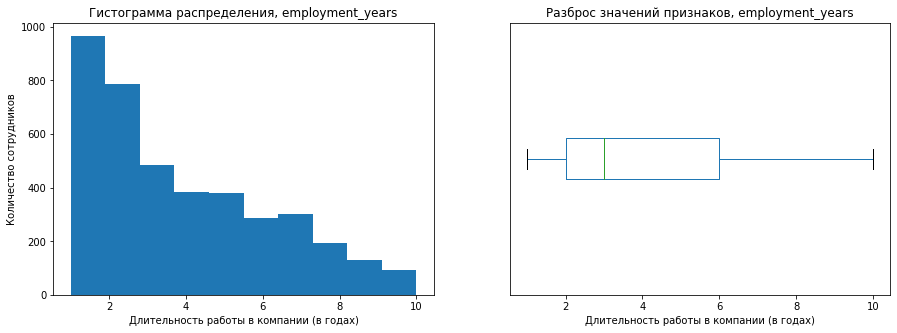

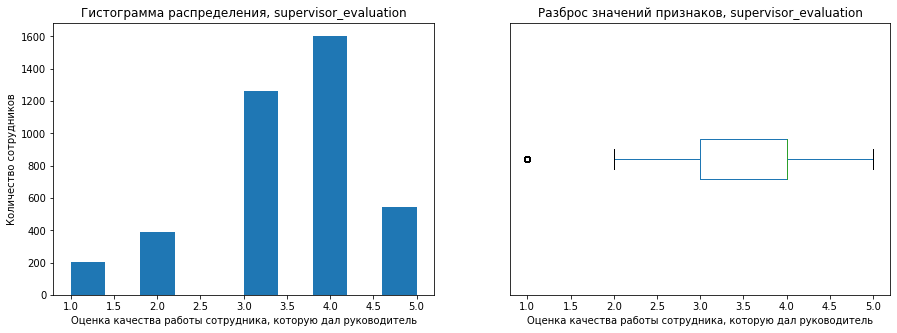

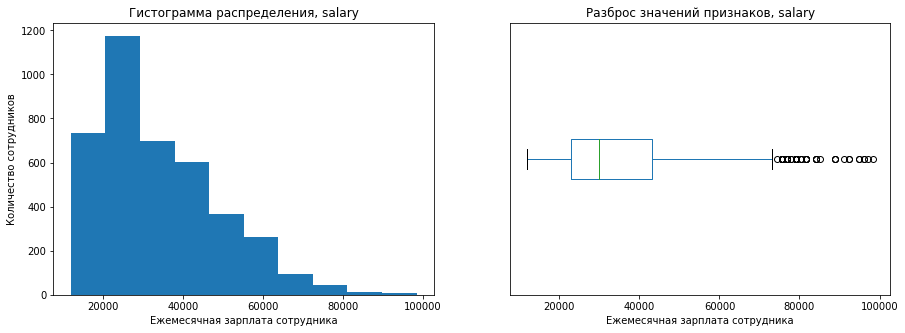

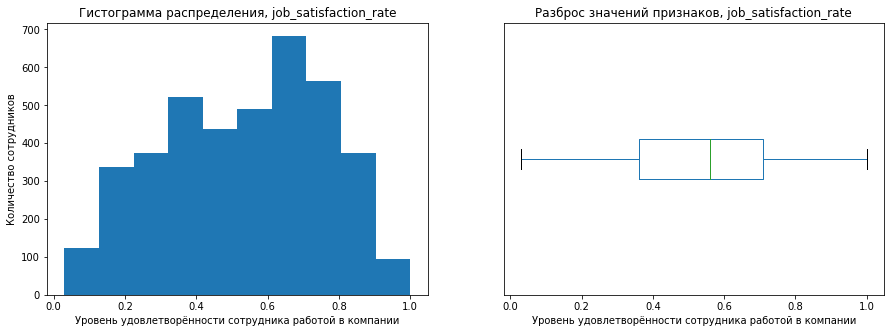

In [26]:
#построим графики распределения количественных признаков
graph_maker_num(train_data, num_col_names_1, num_labels_1)

Распределение признака "длительность работы" с сильным смещением вправо, очень большое количество новых сотрудников.\
Большее количество сотрудников получают оценки от 3 до 4, но есть и небольшое количество очень низких оценок 1\
Распределение признака "зарплата" также нормальное, но со смещением вправо, есть некоторые выбросы по сотрудникам с зарплатой свыше 70000, скорее всего это зарплата сотрудников с высоким уровнем должности - важно оставить эти данные для предсказаний модели.\
Распределение признака "удовлетворенность работой" похоже на нормальное, большинство оценили удовлетворенность работой от 0,3 до 0,7.

In [27]:
#создадим функцию построения графиков распределения качественных признаков
def graph_maker_cat(df, col_names):
    i = 1
    fig, ax = plt.subplots()
    for col_name in col_names:
        ax = plt.subplot(3, 3, i)
        df[col_name].value_counts().plot(kind='pie', autopct='%.1f%%', ax=ax, figsize=(16, 14))
        i +=1
        ax.set_title(f'Диаграмма распределения, {col_name}')
        ax.set_ylabel('')
    fig.tight_layout()  
    plt.show() 

In [28]:
#создадим список качественных признаков
cat_col_names_1 = train_data.select_dtypes(exclude='number').columns.tolist()

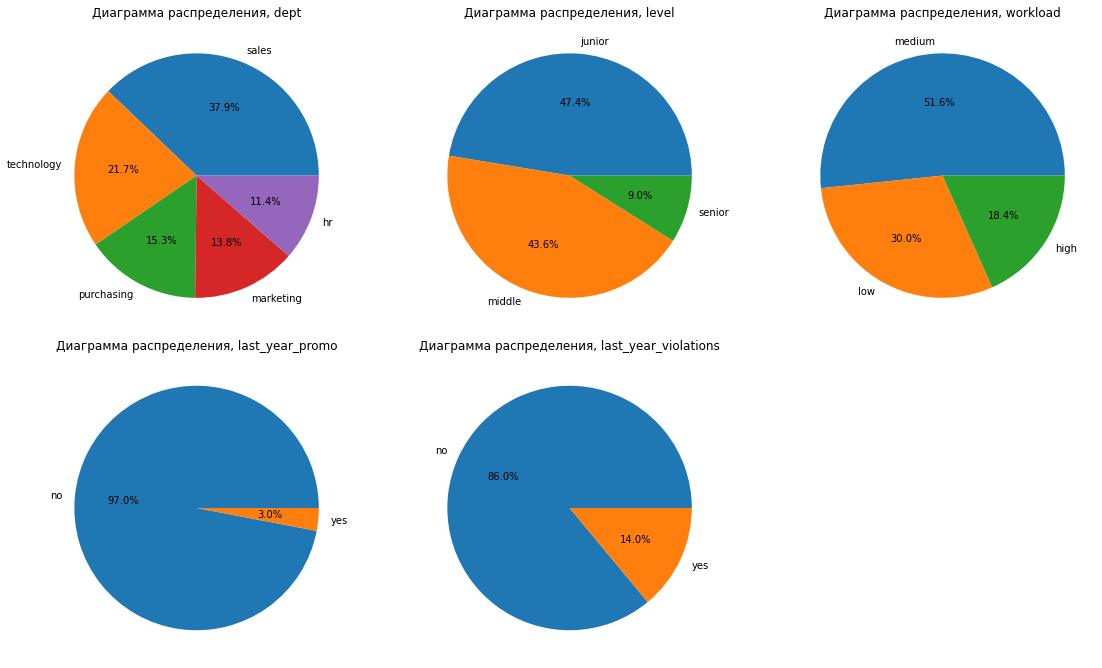

In [29]:
#построим графики распределения качественных признаков
graph_maker_cat(train_data, cat_col_names_1)

Больше всего в выборке представлены записи от сотрудников из отдела продаж, меньше всего - из отдела HR.\
Сильный дисбаланс можно отметить в распределении по уровню должности в компании - в выборке достаточно мало записей о senior уровне, это можно объяснить тем, что в компаниях часто небольшой сектор с сотрудниками высокого уровня должности.\
Также небольшой дисбаланс по уровню загрузки - большинство (51,6%) со средним уровнем загрузки, но также есть 18,4% с высоким уровнем загрузки. 
Сильный дисбаланс в распределениях признаков о наличии повышений и нарушений трудового договора за последний год. 
Малое количество записей с наличием повышений и нарушений договора. 

#### Анализ датасета x_test

In [30]:
#сделаем замену индекса на id
x_test = x_test.set_index('id')

In [31]:
#выведем общее описание датасета
x_test.describe().T

,count,mean,std,min,25%,50%,75%,max
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.0,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.0,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.0,96000.0


Примерно похожие данные на тренировочную выборку, можно отметить сильный разброс по уровню зарплаты, в данных представлены сотрудники с длительностью работы от 1 до 10 лет

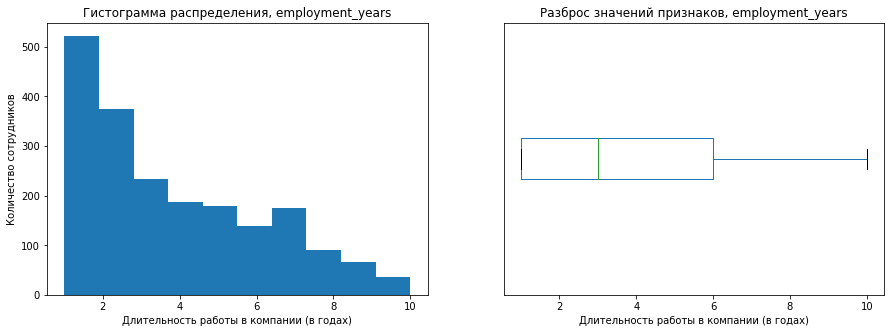

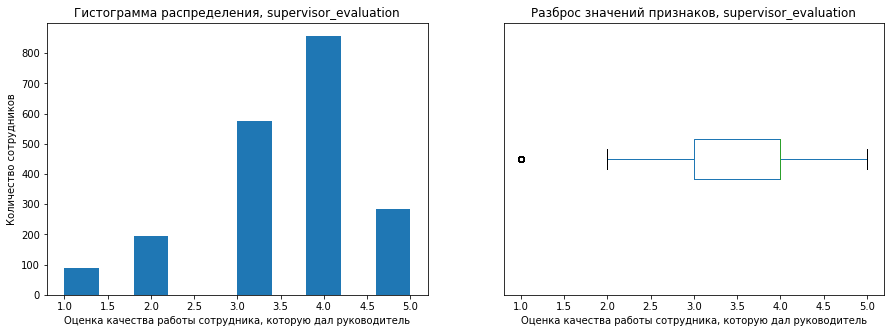

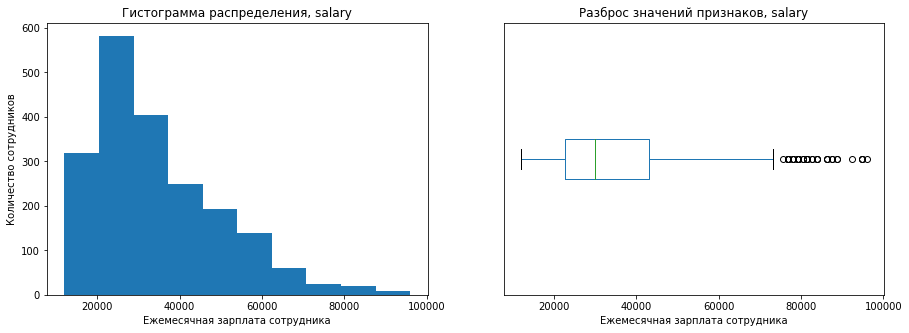

In [32]:
#построим график распределения количественных признаков
graph_maker_num(x_test, num_col_names_1[:3], num_labels_1[:3])

Распределения похожи на тренировочную выборку.
Распределение признака "длительность работы" с сильным смещением вправо, очень большое количество новых сотрудников.
Большее количество сотрудников получают оценки от 3 до 4, но есть и небольшое количество очень низких оценок 1
Распределение признака "зарплата" также нормальное, но со смещением вправо, есть некоторые выбросы по сотрудникам с зарплатой свыше 70000, скорее всего это зарплата сотрудников с высоким уровнем должности - важно оставить эти данные для предсказаний модели.

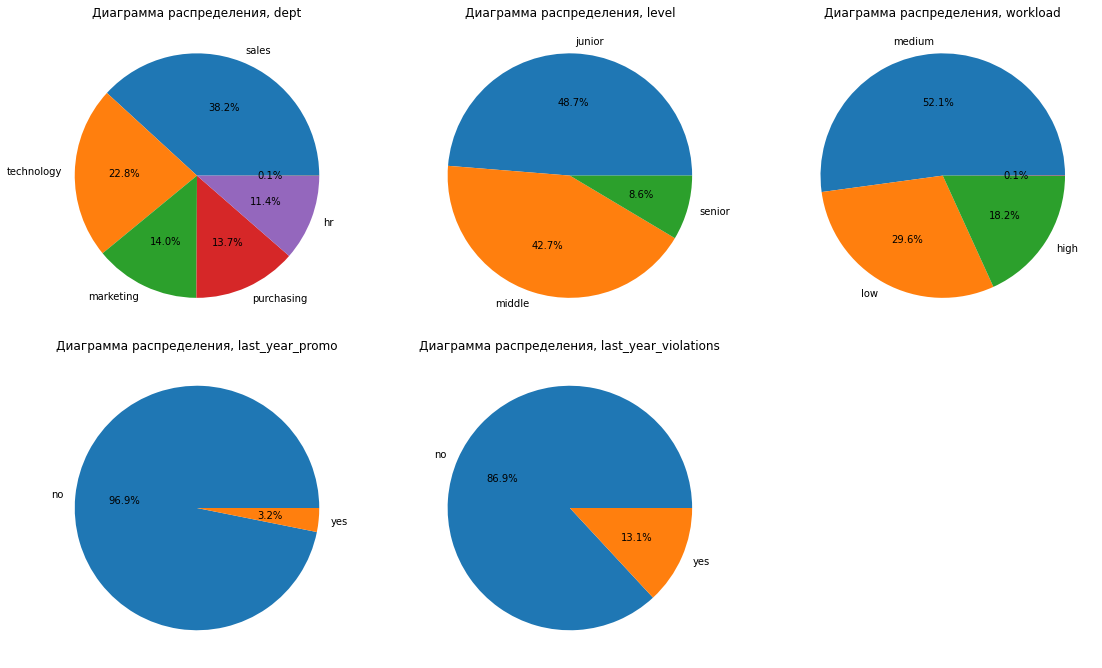

In [33]:
#построим график распределения качественных признаков
graph_maker_cat(x_test, cat_col_names_1)

Также выборка отражает такие же распределения, как и в тренировочной выборке.

Больше всего в выборке представлены записи от сотрудников из отдела продаж, меньше всего - из отдела HR.\
Сильный дисбаланс можно отметить в распределении по уровню должности в компании - в выборке достаточно мало записей о senior уровне, это можно объяснить тем, что в компаниях часто небольшой сектор с сотрудниками высокого уровня должности.\
Также небольшой дисбаланс по уровню загрузки - большинство (52,2%) со средним уровнем загрузки, но также есть 18,2% с высоким уровнем загрузки.\
Сильный дисбаланс в распределениях признаков о наличии повышений и нарушений трудового договора за последний год. Малое количество записей с наличием повышений и нарушений договора.

#### Корреляционный анализ

In [34]:
#подготовим список признаков
interval_cols = train_data.select_dtypes(include='float64').columns.tolist()

In [35]:
#проведем расчет корреляции между признаками
phik_overview = train_data.phik_matrix(interval_cols=interval_cols)

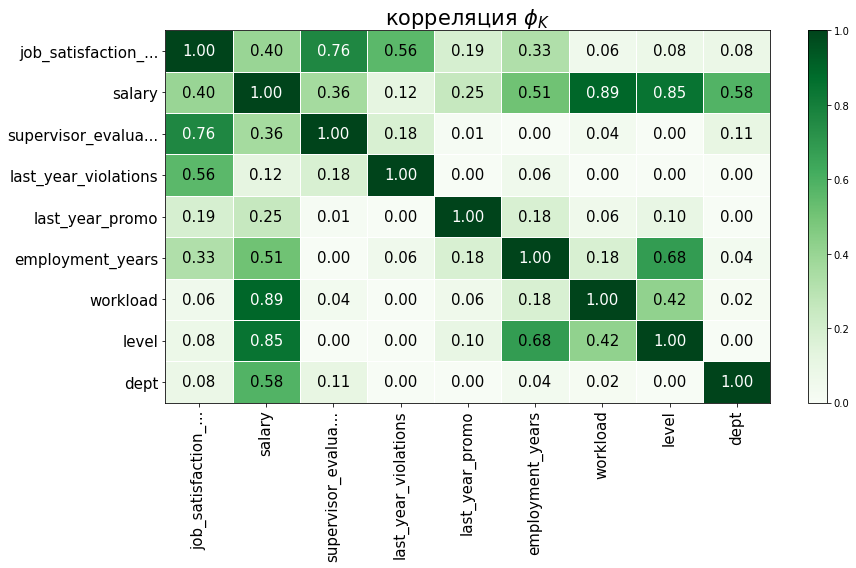

In [36]:
#построим визуализацию матрицы корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels = phik_overview.columns,
    y_labels = phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(13,8)
    
)

Можно отметить наличие высокой связи между признаками с зарплатой и уровнем загрузки, уровнем занимаемой должности.
Высокий уровень связи между удовлетворенностью работой и оценкой руководителя. 

Значения корреляции не превышают критичные значения, поэтому можно отметить отсутствие мультиколлинеарности. 

#### Вывод
Произвели исследовательский анализ данных тренировочной и тестовой выборок.\
Можно отметить, что распределение признака "длительность работы" с сильным смещением вправо, очень большое количество новых сотрудников.\
Большее количество сотрудников получают оценки от 3 до 4, но есть и небольшое количество очень низких оценок 1\
Распределение признака "зарплата" также нормальное, но со смещением вправо, есть некоторые выбросы по сотрудникам с зарплатой свыше 70000, скорее всего это зарплата сотрудников с высоким уровнем должности - важно оставить эти данные для предсказаний модели.\
Распределение признака "удовлетворенность работой" похоже на нормальное, большинство оценили удовлетворенность работой от 0,3 до 0,7.\
Больше всего в выборке представлены записи от сотрудников из отдела продаж, меньше всего - из отдела HR.\
Отметили сильный дисбаланс в распределении по уровню должности в компании и о наличии повышений и нарушений трудового договора за последний год.\
Признаки с уровнем загрузки, уровнем занимаемой должности и с оценкой руководителя являются порядковыми. Нужно обработать их с помощью кодировщика OrdinalEncoder.

### Подготовка данных

Подготовку признаков выполните в пайплайне, дополнив пайплайн шагом предобработки. При кодировании учитывайте особенности признаков и моделей и используйте как минимум два кодировщика.

In [37]:
#заменим индексы на значения id 
y_test = y_test.set_index('id')

In [38]:
#проверим датасет на новые явные дубликаты
train_data.duplicated().sum()

245

In [39]:
#удалим дубликаты из тренировочной выборки
train_data = train_data.drop_duplicates()

Выполним объединение датасетов тестовой выборки

In [40]:
test_data = x_test.merge(y_test, left_index=True, right_index=True)

In [41]:
RANDOM_STATE = 42

X_train = train_data.drop(['job_satisfaction_rate'], axis=1)
y_train = train_data['job_satisfaction_rate']

X_test = test_data.drop(['job_satisfaction_rate'], axis=1)
y_test = test_data['job_satisfaction_rate']

In [42]:
#создаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['workload', 'level', 'supervisor_evaluation']
num_columns = ['salary', 'employment_years']

In [43]:
#создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
#SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe_1', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
    ]
    )

In [44]:
#создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
#SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['high', 'medium', 'low'],
                    ['senior', 'middle', 'junior'],
                    [5.0, 4.0, 3.0, 2.0, 1.0]
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [45]:
#создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [46]:
#создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

### Обучение моделей

Обучите как минимум две модели. Возьмите одну линейную модель, а в качестве второй — дерево решений.\
Подберите гиперпараметры как минимум для одной модели с помощью одного из известных вам инструментов.\
Выберите лучшую модель и проверьте её качество. Выбор делайте на основе новой метрики — SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»).\
Напишите функцию, которая принимает на вход массивы NumPy или объекты Series в pandas и возвращает значение метрики SMAPE. Используйте эту метрику при подборе гиперпараметров и оценке качества моделей.\
Критерий успеха: SMAPE ≤ 15 на тестовой выборке.
В решении сохраните работу со всеми моделями, которые вы пробовали. Сделайте выводы.

In [47]:
param_grid = [
    #словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__min_samples_leaf': range(5, 8),
        'models__max_features': range(5, 8),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    #словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
     #словарь для модели SVR()
    {
        'models': [SVR()],
        'models__C': [0.01,0.1,1,2,5,8,10],
        'models__gamma': [0.01,0.1,1,2,5,8,10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [48]:
#создадим функцию для расчета SMAPE
def smape(y_test, y_pred):
    den = (np.abs(y_test) + np.abs(y_pred)) / 2
    diff = np.abs(y_test - y_pred)/den
    metric = 100 * np.mean(diff)
    return metric

# создаём пользовательскую метрику
smape_score = make_scorer(smape, greater_is_better=False) 

In [49]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape_score,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=70
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe_1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                          

In [50]:
#проверим работу лучшей модели на тестовой выборке
y_test_pred = randomized_search.best_estimator_.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [51]:
#вычислим метрику smape
smape(y_test, y_test_pred)

13.905599862270519

#### Вывод
Обучили три модели - DecisionTreeRegressor, SVR, LinearRegression. 
Использовали инструмент RandomizedSearchCV для подбора гиперпараметров. Получили лучшую модель - SVR со со значением метрики SMAPE на тренировочной и тестовой выборке равной 15.16 и 13.90 соответственно

### Вывод

Сделайте промежуточные выводы о том, какая модель справилась лучше и почему.


Получили лучшую модель - SVR, можно предположить, что с нелинейно-зависимыми данными хорошо справилось ядро RBF, с помощью кросс-валидации подобрали оптимальные параметры для модели, и она хорошо справляется с небольшими выборками данных и сравнительно большим количеством признаков.

До удаления дубликатов после удаления признака id, лучше справлялось дерево решений - скорее всего, из-за ложных связей, которое строило дерево по одинаковым данным

Посмотрим на топ-5 лучших моделей с параметрами 

In [52]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(randomized_search.cv_results_).sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__min_samples_leaf,param_models__max_features,param_models,param_models__gamma,param_models__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,0.291502,0.013920,0.030995,0.001250,StandardScaler(),NaN,NaN,SVR(),0.1,5.0,"{'preprocessor__num': StandardScaler(), 'models__gamma': 0.1, 'models__C': 5, 'models': SVR()}",-15.186867,-14.472308,-14.375007,-16.473074,-15.309460,-15.163343,0.753167,1
2,0.313056,0.016807,0.034635,0.002086,MinMaxScaler(),NaN,NaN,SVR(),0.1,8.0,"{'preprocessor__num': MinMaxScaler(), 'models__gamma': 0.1, 'models__C': 8, 'models': SVR()}",-16.066877,-14.938314,-15.562712,-16.080132,-15.700620,-15.669731,0.417979,2
13,0.279630,0.009615,0.035911,0.003530,MinMaxScaler(),NaN,NaN,SVR(),0.1,5.0,"{'preprocessor__num': MinMaxScaler(), 'models__gamma': 0.1, 'models__C': 5, 'models': SVR()}",-16.225180,-14.986692,-15.847025,-16.202531,-15.626121,-15.777510,0.454796,3
10,0.026459,0.000962,0.011114,0.000486,StandardScaler(),7.0,7.0,DecisionTreeRegressor(random_state=42),NaN,NaN,"{'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 7, 'models__max_features': 7, 'models': DecisionTreeRegressor(random_state=42)}",-15.639455,-14.769849,-17.024693,-16.392311,-16.150616,-15.995385,0.757594,4
52,0.030068,0.005747,0.012235,0.001489,passthrough,7.0,7.0,DecisionTreeRegressor(random_state=42),NaN,NaN,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 7, 'models__max_features': 7, 'models': DecisionTreeRegressor(random_state=42)}",-15.642291,-14.769849,-17.010464,-16.472535,-16.150616,-16.009151,0.762604,5


Видим, что в большинстве случаев модель SVR справляется лучше, чем дерево решений

Посмотрим на то, какие признаки были самыми важными для модели. 

In [55]:
#подготовим наименования признаков для интерпретации прогнозов модели
ohe_features = (
    randomized_search.best_estimator_['preprocessor']
    .named_transformers_['ohe']
    .get_feature_names_out()
)

In [56]:
#сформируем список признаков
columns = np.concatenate([ohe_features, ord_columns, num_columns])

In [57]:
#кодируем признаки 
X_train_coded = randomized_search.best_estimator_['preprocessor'].transform(X_train)

In [58]:
#кодируем признаки 
X_test_coded = randomized_search.best_estimator_['preprocessor'].transform(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [59]:
#выбираем лучшую модель
model = randomized_search.best_estimator_['models']

In [60]:
#подготовим данные для интерпретации
masker = shap.maskers.Independent(X_train_coded, max_samples=10)

In [61]:
#запускаем алгоритм 
explainer = shap.Explainer(model.predict, masker, feature_names = columns)

In [62]:
shap_values = explainer(X_test_coded)

PermutationExplainer explainer: 2001it [03:28,  9.32it/s]                          


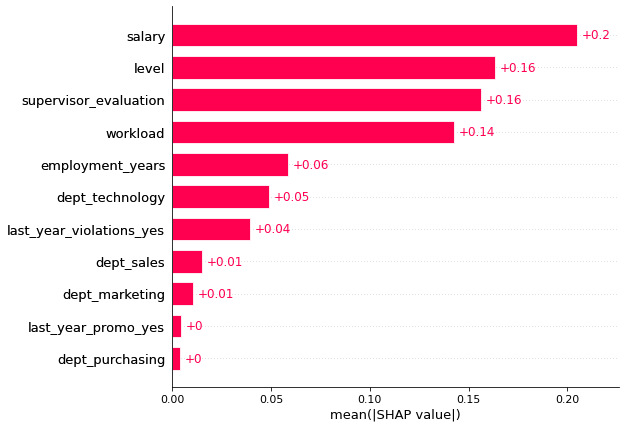

In [63]:
#построим график общей значимости признаков
shap.plots.bar(shap_values, max_display=20)

Видим, что самым важным признаком при предсказании уровня удовлетворенности сотрудника была зарплата и уровень должности сотрудника, менее важными модель посчитала признаки: отдел, наличие повышений за прошлый год и наличие нарушений трудового договора

## Задача 2: предсказание увольнения сотрудника из компании

### Загрузка данных

Тренировочная выборка:
train_quit.csv

Входные признаки тестовой выборки те же, что и в прошлой задаче:
test_features.csv

Целевой признак тестовой выборки:
test_target_quit.csv


In [64]:
#считаем данные и подгрузим в соответствующие датафреймы
train_quit_data = pd.read_csv('train_quit.csv')

In [65]:
#считаем данные и подгрузим в соответствующие датафреймы
x_test_quit = x_test

In [66]:
#считаем данные и подгрузим в соответствующие датафреймы
y_test_quit = pd.read_csv('test_target_quit.csv')

In [67]:
#выведем общее инфо о датасете с тренировочной выборкой
main_info(train_quit_data)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


Можно отметить отсутствие пропусков, типы данных соответствуют ожидаемым. 

In [68]:
#выведем общее инфо о датасете с тестовой выборкой
main_info(x_test_quit)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 205.2+ KB


Видим пропуски в столбцах со признаками: "отдел", "уровень должности", "загрузка"

In [69]:
#выведем общее инфо о датасете с целевым признаком тестовой выборки
main_info(y_test_quit)

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


В датасете нет пропусков, типы данных соответствуют ожидаемым

#### Вывод
Произвели загрузку и обзор данных, можно отметить наличие пропусков в столбцах с отделом и уровнем занимаемой должности, а также в уровне загрузки сотрудника, типы данных соответствуют ожидаемым

### Предобработка данных

Изучите данные и при необходимости выполните предобработку. Если есть пропуски, заполните их в пайплайне.

#### Датасет train_quit_data

In [70]:
#выведем все уникальные значения в датасете с тренировочной выборкой
train_quit_data.select_dtypes(exclude='number').apply(lambda x: x.unique())

dept                    [sales, purchasing, marketing, technology, hr]
level                                         [middle, junior, sinior]
workload                                           [high, medium, low]
last_year_promo                                              [no, yes]
last_year_violations                                         [no, yes]
quit                                                         [no, yes]
dtype: object

Видим опечатку в столбце с уровнем должности, произведем замену

In [71]:
train_quit_data['level'] = train_quit_data['level'].replace('sinior', 'senior')

In [72]:
#проверим наличие дубликатов
train_quit_data.duplicated().sum()

0

##### Вывод

Произвели предобработку данных датасета с тренировочной выборкой, исправили опечатку в названии уровня должности, дубликаты не найдены

#### Датасет x_test_quit

In [73]:
#выведем все уникальные значения в датасете с тренировочной выборкой
x_test_quit.select_dtypes(exclude='number').apply(lambda x: x.unique())

dept                    [marketing, hr, sales, purchasing, technology, nan,  ]
level                                            [junior, middle, senior, nan]
workload                                                [medium, low, high,  ]
last_year_promo                                                      [no, yes]
last_year_violations                                                 [no, yes]
dtype: object

In [74]:
x_test_quit['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

##### Вывод
Использовали уже предобработанный датасет, пропуски будут заменены через пайплайн

### Иследовательский анализ данных

Проведите исследовательский анализ данных.

Составьте портрет «уволившегося сотрудника». Например, можно узнать, в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности. Также можно сравнить среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверьте это утверждение: визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используйте данные с обоими целевыми признаками тестовой выборки.

#### Анализ датасета train_quit_data

In [75]:
#сделаем замену индексов на значения id
train_quit_data = train_quit_data.set_index('id')

In [76]:
#выведем описание количественных признаков
train_quit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
employment_years,4000.0,3.70150,2.541852,1.0,2.0,3.0,6.0,10.0
supervisor_evaluation,4000.0,3.47475,1.004049,1.0,3.0,4.0,4.0,5.0
salary,4000.0,33805.80000,15152.415163,12000.0,22800.0,30000.0,43200.0,96000.0


Также видим большой разброс данных по значению зарплаты, длительности работы в компании.\
Построим графики для детального разбора

In [77]:
#составим список количественных признаков для построения графика
num_col_names_2 = train_quit_data.select_dtypes(include='number').columns.tolist()

In [78]:
#список подписей к графику
num_labels_2 = [
    'Длительность работы в компании (в годах)',
    'Оценка качества работы сотрудника, которую дал руководитель',
    'Ежемесячная зарплата сотрудника'
]

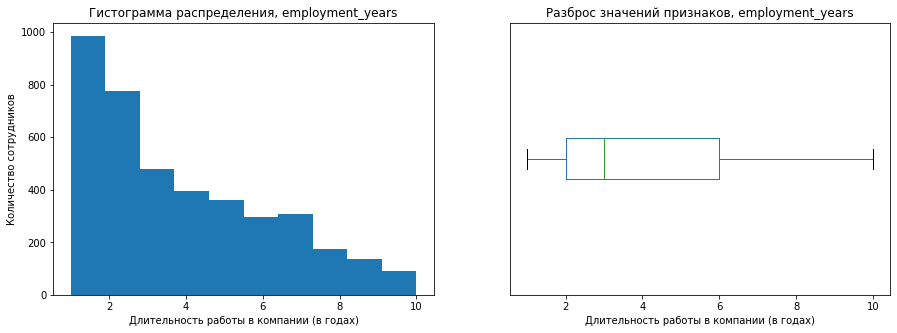

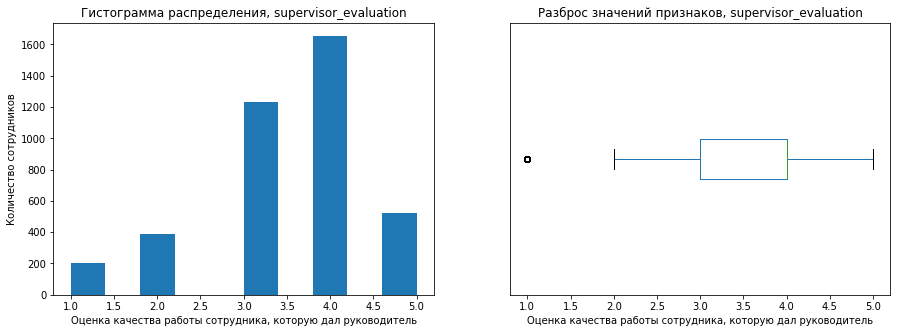

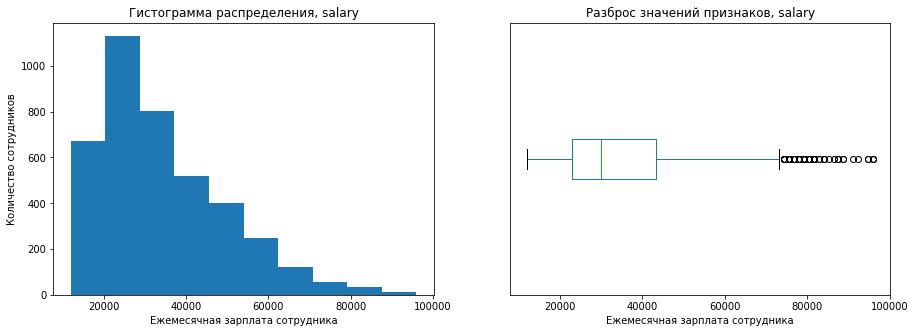

In [79]:
#построим график распределения количественных признаков
graph_maker_num(train_quit_data, num_col_names_2, num_labels_2)

Также отметим, что распределение признака "длительность работы" с сильным смещением вправо, большое количество новых сотрудников.
Большее количество сотрудников получают оценки от 3 до 4, но есть и небольшое количество очень низких оценок 1-2
Распределение признака "зарплата" нормальное, со смещением вправо, наблюдаются выбросы по сотрудникам с зарплатой свыше 70000, скорее всего это зарплата сотрудников с высоким уровнем должности - важно оставить эти данные для предсказаний модели.

In [80]:
#составим список качественных признаков для построения графика
cat_col_names_2 = train_quit_data.select_dtypes(exclude='number').columns.tolist()

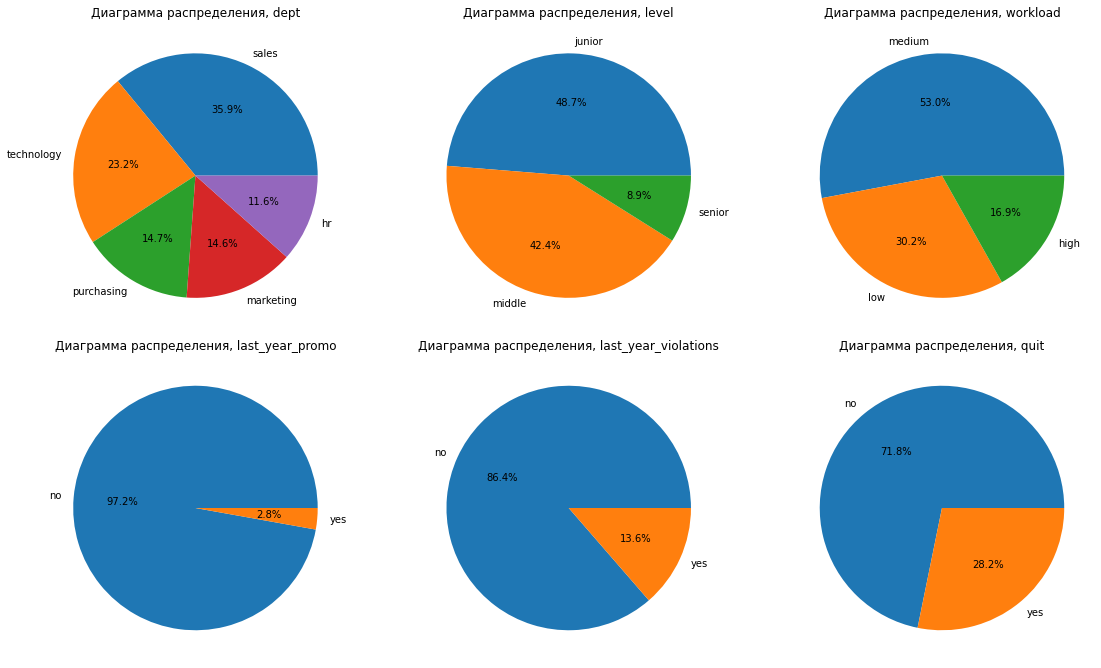

In [81]:
#построим диаграммы распределения качественных признаков
graph_maker_cat(train_quit_data, cat_col_names_2)

Больше всего в выборке представлены записи от сотрудников из отдела продаж, меньше всего - из отдела HR.\
Также отметим дисбаланс в распределении по уровню должности в компании - в выборке мало записей о senior уровне(8.9%), предполагаем, что в компаниях зачастую небольшой сектор с сотрудниками высокого уровня должности.\
Небольшой дисбаланс по уровню загрузки - большинство (53%) со средним уровнем загрузки, но также есть 16.9% с высоким уровнем загрузки.\
Сильный дисбаланс в распределениях признаков о наличии повышений и нарушений трудового договора за последний год.\
Очень мало сотрудников получили повышение в прошлом году, также количество нарушителей договора составляет 13.6%.\
Распределение по признаку "увольнение" с небольшим дисбалансом, количество увольнений - 28.2%

#### Корреляционный анализ

In [82]:
#подготовим список признаков
interval_cols = train_quit_data.select_dtypes(include='float64').columns.tolist()

In [83]:
#проведем расчет корреляции между признаками
phik_overview = train_quit_data.phik_matrix(interval_cols=interval_cols)

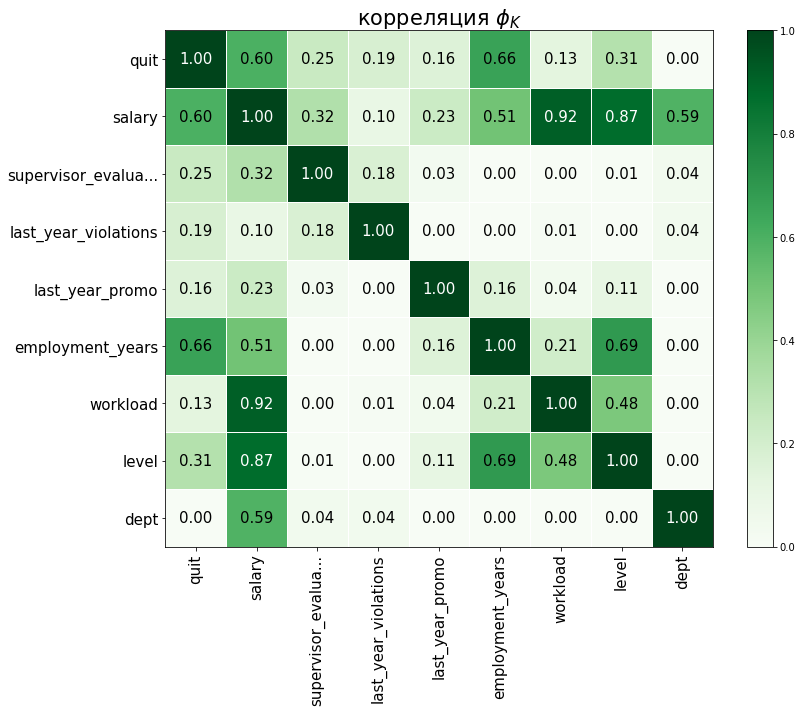

In [84]:
#построим визуализацию матрицы корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels = phik_overview.columns,
    y_labels = phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(12,10)
    
)

Можно отметить наличие высокой связи между уровнем загрузки, уровнем должности с зарплатой - логичная взаимосвязь, относительно классическая структура для компании. 
Можем сказать, что мультиколнеарности между входящими признаками нет

#### Портрет «уволившегося сотрудника»

Составьте портрет «уволившегося сотрудника». Например, можно узнать, в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности. Также можно сравнить среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.

In [85]:
#создадим выборку с ушедшими сотрудниками
quit_positive = train_quit_data[train_quit_data['quit'] == 'yes']

In [86]:
#создадим выборку с оставшимися сотрудниками
quit_negative = train_quit_data[train_quit_data['quit'] == 'no']

In [87]:
#сгруппируем данные по отделам, и посчитаем долю ушедших сотрудников в каждом
quit_dept = train_quit_data.groupby(['dept'])['quit'].value_counts(normalize=True)
quit_dept

dept        quit
hr          no      0.750000
            yes     0.250000
marketing   no      0.719931
            yes     0.280069
purchasing  no      0.717687
            yes     0.282313
sales       no      0.716968
            yes     0.283032
technology  no      0.702586
            yes     0.297414
Name: quit, dtype: float64

In [88]:
#отберем данные по ушедшим сотрудникам
quit_dept_positive = quit_dept.loc[quit_dept.index.get_level_values(1) == 'yes']

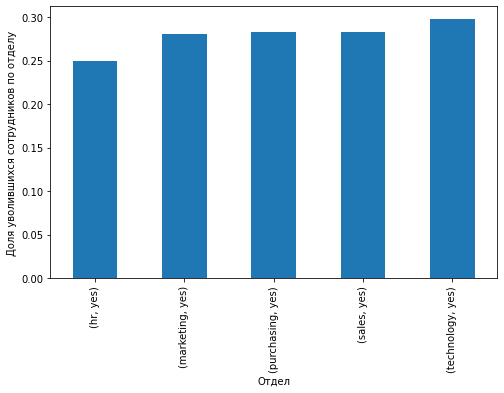

In [89]:
plt.figure(figsize=(8,5))
ax = quit_dept_positive.plot(kind='bar')
ax.set_ylabel('Доля уволившихся сотрудников по отделу')
ax.set_xlabel('Отдел')
plt.show()

Чаще всего сотрудники уходят из отдела технологий, на последнем месте по доле уволившихся в отделе - hr


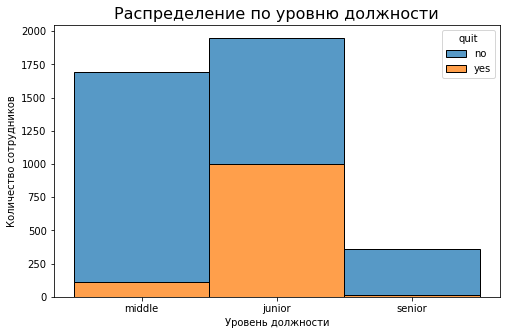

In [91]:
plt.figure(figsize=(8,5))
ax = sns.histplot(data=train_quit_data, x="level", hue="quit", multiple="stack")
ax.set_title('Распределение по уровню должности', fontsize=16)
ax.set_xlabel('Уровень должности')
ax.set_ylabel('Количество сотрудников')
plt.show()

Видим, что чаще всего уходят сотрудники с уровнем junior

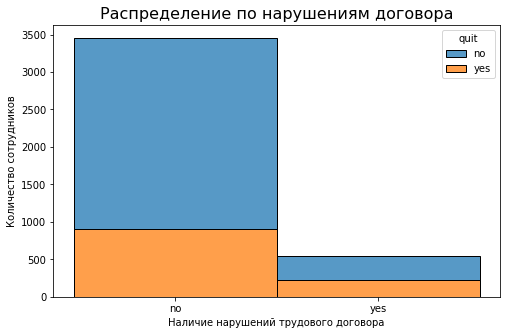

In [92]:
plt.figure(figsize=(8,5))
ax = sns.histplot(data=train_quit_data, x="last_year_violations", hue="quit", multiple="stack")
ax.set_title('Распределение по нарушениям договора', fontsize=16)
ax.set_xlabel('Наличие нарушений трудового договора')
ax.set_ylabel('Количество сотрудников')
plt.show()

Уволившиеся сотрудники чаще нарушали трудовой договор, чем оставшиеся сотрудники

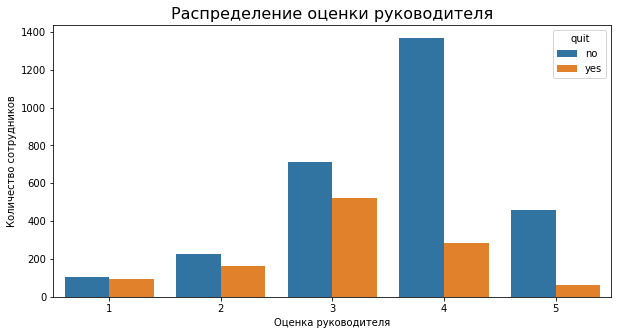

In [94]:
plt.figure(figsize=(10,5))
#построим графики распределения оценки руководителя
ax = sns.countplot(data=train_quit_data, x='supervisor_evaluation', hue='quit')
ax.set_title('Распределение оценки руководителя', fontsize=16)
ax.set_xlabel('Оценка руководителя')
ax.set_ylabel('Количество сотрудников')
plt.show()

Можно отметить, что для уволившихся сотрудников самая частая оценка руководителя - 3, в то время как оставшиеся сотрудники чаще получают оценку 4. 
Оставшиеся сотрудники чаще получают оценку 5, чем оценку 1 и 2, в то время как ушедшие - чаще получают низкие оценки 1-2, а не 5

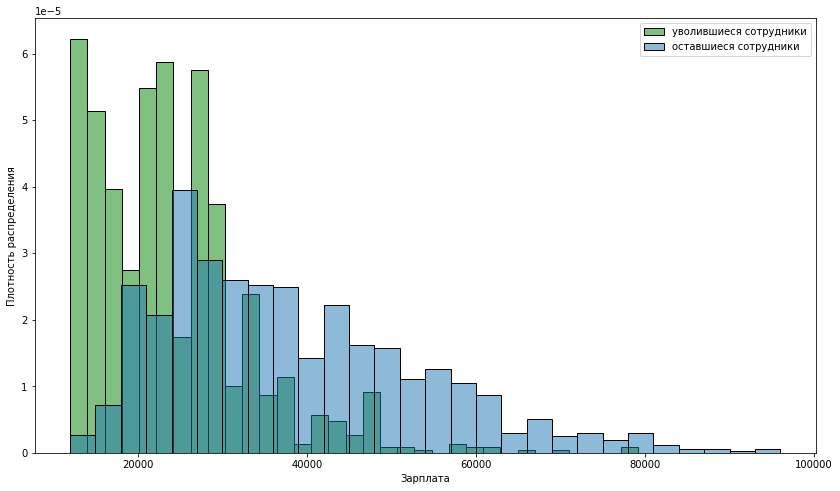

In [95]:
plt.figure(figsize=(14, 8))
#построим графики распределения зарплат у разных групп сотрудников 
ax = sns.histplot(quit_positive, 
                  x='salary', 
                  alpha=0.5, 
                  stat='density', 
                  color='green', 
                  label='уволившиеся сотрудники'
                 )
ax = sns.histplot(quit_negative, 
                  x='salary', 
                  alpha=0.5, 
                  stat='density', 
                  label='оставшиеся сотрудники')

#добавляем легенду и выводим график на экран
ax.set(xlabel='Зарплата', ylabel='Плотность распределения')
plt.legend()
plt.show()

In [96]:
quit_positive.describe().T

,count,mean,std,min,25%,50%,75%,max
employment_years,1128.0,1.844858,1.274920,1.0,1.0,1.0,2.0,10.0
supervisor_evaluation,1128.0,3.046099,0.973291,1.0,3.0,3.0,4.0,5.0
salary,1128.0,23885.106383,9351.599505,12000.0,16800.0,22800.0,27600.0,79200.0


In [97]:
quit_negative.describe().T

,count,mean,std,min,25%,50%,75%,max
employment_years,2872.0,4.430710,2.544635,1.0,2.0,4.0,6.0,10.0
supervisor_evaluation,2872.0,3.643106,0.965295,1.0,3.0,4.0,4.0,5.0
salary,2872.0,37702.228412,15218.977339,12000.0,25200.0,34800.0,46800.0,96000.0


Большее количество уволившихся сотрудников имели низкие зарплаты (<30000), медианное значение - 22800, у оставшихся сотрудников распределение менее скошено вправо, c медианным значением 34800.

Проверим утверждение, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. 

In [98]:
#заменим индексы на значения id
y_test_quit = y_test_quit.set_index('id')

In [99]:
#объединим данные с обоими целевыми признаками тестовой выборки
test_quit_data = test_data.merge(y_test_quit, left_index=True, right_index=True)
test_quit_data.head(10)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
686555,hr,junior,medium,1,no,no,4,30000,0.72,no
467458,sales,middle,low,5,no,no,4,19200,0.64,no
418655,sales,middle,low,6,no,no,4,19200,0.60,no
789145,hr,middle,medium,5,no,no,5,40800,0.75,no
429973,purchasing,middle,medium,6,no,no,3,42000,0.67,yes
850699,technology,junior,medium,3,no,no,3,26400,0.36,yes
500791,sales,middle,high,9,no,no,4,49200,0.73,no
767867,marketing,middle,high,3,no,yes,4,62400,0.44,no


In [100]:
test_quit_positive = test_quit_data[test_quit_data['quit'] == 'yes']

In [101]:
test_quit_negative = test_quit_data[test_quit_data['quit'] == 'no']

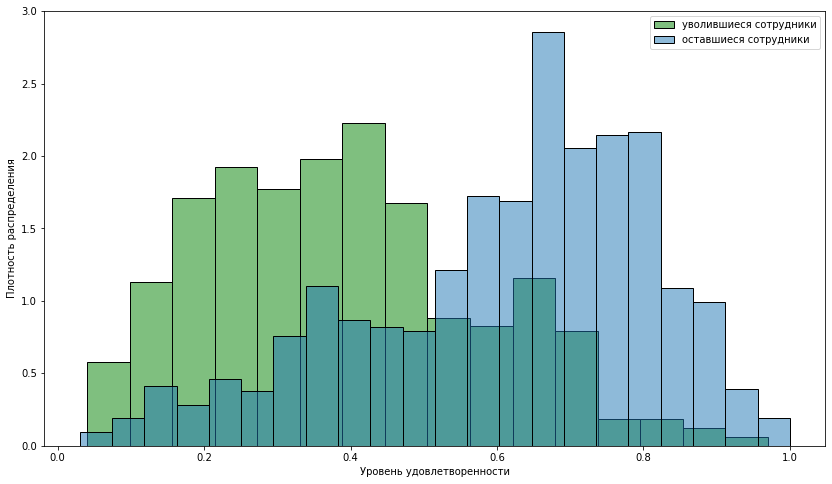

In [102]:
plt.figure(figsize=(14, 8))
#построим графики распределения зарплат у разных групп сотрудников 
ax = sns.histplot(test_quit_positive, 
                  x='job_satisfaction_rate', 
                  alpha=0.5, 
                  stat='density', 
                  color='green', 
                  label='уволившиеся сотрудники'
                 )
ax = sns.histplot(test_quit_negative, 
                  x='job_satisfaction_rate', 
                  alpha=0.5, 
                  stat='density', 
                  label='оставшиеся сотрудники')

#добавляем легенду и выводим график на экран
ax.set(xlabel='Уровень удовлетворенности', ylabel='Плотность распределения')
plt.legend()
plt.show()

In [103]:
test_quit_positive.describe().T

,count,mean,std,min,25%,50%,75%,max
employment_years,564.0,1.975177,1.552888,1.00,1.00,1.00,2.0000,10.00
supervisor_evaluation,564.0,3.042553,0.926211,1.00,3.00,3.00,4.0000,5.00
salary,564.0,24955.319149,10650.300744,12000.00,18000.00,22800.00,30000.0000,80400.00
job_satisfaction_rate,564.0,0.387713,0.185784,0.04,0.24,0.37,0.4925,0.97


In [104]:
test_quit_negative.describe().T

,count,mean,std,min,25%,50%,75%,max
employment_years,1436.0,4.330780,2.540800,1.00,2.0,4.00,6.00,10.0
supervisor_evaluation,1436.0,3.716574,0.958965,1.00,3.0,4.00,4.00,5.0
salary,1436.0,37645.403900,15503.475156,12000.00,25200.0,33600.00,48000.00,96000.0
job_satisfaction_rate,1436.0,0.612040,0.199367,0.03,0.5,0.66,0.76,1.0


По графику можем сделать вывод о том, что у уволившихся сотрудников в основном был низкий уровень удовлетворенности (в среднем 0,39), в то время как у оставшихся сотрудников - достаточно высокий уровень (в среднем 0.61)

##### Вывод
1. Чаще всего сотрудники уходят из отдела технологий, на последнем месте по доле уволившихся в отделе - hr
2. Уволившиеся сотрудников чаще были уровня junior
3. Уволившиеся сотрудники чаще нарушали трудовой договор, чем оставшиеся сотрудники
4. Уволившиеся сотрудники чаще остальных получали низкие оценки от руководителя. 
5. Большое количество уволившихся сотрудников имели низкие зарплаты, по сравнению с оставшимися сотрудниками
6. Можно сказать, что уровень удовлетворенности сотрудника работой в компании влияет на решение уволиться - среднее значение удовлетворенности работой у уволившихся сотрудников - 0,39, у оставшихся - 0,61

### Добавление нового входного признака

Допустим, job_satisfaction_rate и quit действительно связаны и вы получили необходимое значение метрики в первой задаче. Тогда добавьте job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

In [105]:
RANDOM_STATE = 42

encoder = LabelEncoder()

In [106]:
X_train_quit = train_quit_data.drop(['quit'], axis=1)

In [107]:
y_train_quit = encoder.fit_transform(train_quit_data['quit'])

In [108]:
#добавим новый признак 
X_train_quit['job_satisfaction_rate'] = randomized_search.best_estimator_.predict(X_train_quit)

In [109]:
X_test_quit = test_quit_data.drop(['quit'], axis=1)

In [110]:
y_test_quit = encoder.transform(test_quit_data['quit'])

In [111]:
#добавим новый признак 
X_test_quit['job_satisfaction_rate'] = randomized_search.best_estimator_.predict(X_test_quit)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Подготовка данных

Подготовьте признаки так же, как и в первой задаче: выполните подготовку в пайплайне, дополнив пайплайн предобработки. При кодировании учитывайте особенности признаков и моделей и используйте как минимум два кодировщика.

In [112]:
#создаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['workload', 'level', 'supervisor_evaluation']
num_columns = ['salary', 'employment_years', 'job_satisfaction_rate']

In [113]:
#создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
#SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe_1', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     #('simpleImputer_ohe_2', SimpleImputer(missing_values=' ', strategy='most_frequent')),
     ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
    ]
)

In [114]:
#создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
#SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['high', 'medium', 'low'],
                    ['senior', 'middle', 'junior'],
                    [5.0, 4.0, 3.0, 2.0, 1.0]
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [115]:
#создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [116]:
#создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

### Обучение модели

Обучите как минимум три модели. Как минимум для двух из них подберите гиперпараметры. Проверьте качество лучшей модели.
Метрика оценки качества в этой задаче — ROC-AUC. Критерий успеха: ROC-AUC ≥0.91 на тестовой выборке. Напомним: отбор признаков часто помогает улучшить метрику.


In [117]:
param_grid = [
    #словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 7),
        'models__max_features': range(5, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    #словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(5, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    #словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
     #словарь для модели SVС()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel = 'rbf', probability=True)],
        'models__C': [0.01,0.1,1,2,5,10],
        'models__gamma': [0.01,0.1,1,2,5,10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [118]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=50
)
randomized_search.fit(X_train_quit, y_train_quit)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe_1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('simpleImputer_ohe_2',
                                                                   SimpleImputer(missing_values=' ',
                                                                                 strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                            

In [119]:
#проверим работу модели на тестовой выборке
probabilities = randomized_search.predict_proba(X_test_quit)
probabilities_one = probabilities[:, 1]
print(f'Площадь ROC-кривой на тестовой выборке: {roc_auc_score(y_test_quit, probabilities_one)}')

Площадь ROC-кривой на тестовой выборке: 0.9245725419308956


### Выводы

Сделайте промежуточные выводы о том, какая модель справилась лучше и почему.

Лучше всех справилась модель SVC, можно предположить, что так как данные не являются линейно-зависимыми - с классификацией хорошо справилось ядро RBF, с помощью кросс-валидации подобрали оптимальные параметры для модели, и подобная модель хорошо справляется с небольшими выборками данных и сравнительно большим количеством признаков. 

Посмотрим на топ-5 моделей

In [120]:
pd.DataFrame(randomized_search.cv_results_).sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__gamma,param_models__C,param_models,param_models__n_neighbors,param_models__max_features,param_models__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
41,0.793480,0.016162,0.052550,0.006432,MinMaxScaler(),0.1,5.0,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,"{'preprocessor__num': MinMaxScaler(), 'models__gamma': 0.1, 'models__C': 5, 'models': SVC(probability=True, random_state=42)}",0.925183,0.925820,0.926590,0.926602,0.945827,0.930004,0.007929,1
27,0.840423,0.041932,0.047980,0.000811,MinMaxScaler(),0.1,10.0,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,"{'preprocessor__num': MinMaxScaler(), 'models__gamma': 0.1, 'models__C': 10, 'models': SVC(probability=True, random_state=42)}",0.923629,0.926740,0.925264,0.926494,0.946521,0.929730,0.008468,2
11,0.763017,0.022450,0.051981,0.008800,StandardScaler(),0.1,2.0,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,"{'preprocessor__num': StandardScaler(), 'models__gamma': 0.1, 'models__C': 2, 'models': SVC(probability=True, random_state=42)}",0.916742,0.921252,0.921055,0.926031,0.942304,0.925477,0.008913,3
16,0.029737,0.000456,0.026115,0.000230,StandardScaler(),NaN,NaN,KNeighborsClassifier(),7.0,NaN,NaN,"{'preprocessor__num': StandardScaler(), 'models__n_neighbors': 7, 'models': KNeighborsClassifier()}",0.922454,0.930238,0.914931,0.923044,0.931724,0.924478,0.006049,4
48,0.029553,0.000730,0.013011,0.000276,StandardScaler(),NaN,NaN,DecisionTreeClassifier(random_state=42),NaN,5.0,5.0,"{'preprocessor__num': StandardScaler(), 'models__max_features': 5, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}",0.926191,0.913040,0.914453,0.925646,0.936303,0.923127,0.008560,5


Видим, что на первых 3х местах модель SVC с разными параметрами.

In [121]:
#подготовим наименования признаков для интерпретации прогнозов модели
ohe_features = (
    randomized_search.best_estimator_['preprocessor']
    .named_transformers_['ohe']
    .get_feature_names_out()
)

In [122]:
#сформируем список признаков
columns = np.concatenate([ohe_features, ord_columns, num_columns])

In [123]:
X_train_quit_coded = randomized_search.best_estimator_['preprocessor'].transform(X_train_quit)

In [124]:
#кодируем признаки 
X_test_quit_coded = randomized_search.best_estimator_['preprocessor'].transform(X_test_quit)

In [125]:
#выбираем лучшую модель
model = randomized_search.best_estimator_['models']

In [126]:
#подготовим данные для интерпретации
masker = shap.maskers.Independent(X_train_quit_coded, max_samples=10)

In [127]:
#запускаем алгоритм 
explainer = shap.Explainer(model.predict, masker, feature_names = columns)

In [128]:
shap_values = explainer(X_test_quit_coded)

PermutationExplainer explainer: 2001it [06:33,  4.95it/s]                          


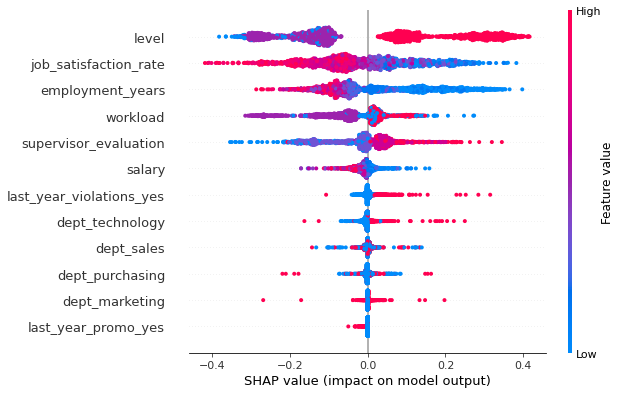

In [129]:
#построим график общей значимости признаков
shap.plots.beeswarm(shap_values, max_display=20)

Можно отметить, что модель посчитала важными признаки - уровень занимаемой должности, длительность работы и новый признак - уровень удовлетворенности сотрудника. Менее важными - нарушения договора, отдел или наличие повышений за последний год.  

При этому прослеживаются закономерности:
1. чем выше уровень занимаемой должности, тем выше вероятность увольнения сотрудника
2. чем меньше длительность работы, тем выше вероятность увольнения сотрудника
3. чем ниже уровень удовлетворенности сотрудника, тем выше вероятность увольнения сотрудника
4. чем выше загрузка сотрудника, тем меньше вероятность увольнения

## Общий вывод

Сформулируйте общий вывод:
опишите задачу;
опишите все этапы работы;
добавьте выводы и дополнительные предложения для бизнеса.


Была поставлены две задачи: построить модель, которая сможет предсказать уровень удовлетворенности сотрудника. Также построить модель, которая сможет предсказать, что сотрудник уволится из компании.

Исходные данные были даны в виде трех таблиц с данными:
Тренировочная выборка, входные и целевой признак тестовой выборки (для двух задач разные целевые признаки). 

Была произведена предобработка данных, исправлены опечатки в названиях должности. Не были найдены дубликаты данных, типы данных соответствуют ожидаемым. Найденные пропуски были обработаны в пайплайне. 

Далее был произведен исследовательский анализ данных тренировочной и тестовой выборок.
- Можно отметить, что распределение признака "длительность работы" с сильным смещением вправо, очень большое количество новых сотрудников.
- Большее количество сотрудников получают оценки от 3 до 4, но есть и небольшое количество очень низких оценок 1
- Распределение признака "зарплата" также нормальное, но со смещением вправо, есть некоторые выбросы по сотрудникам с зарплатой свыше 70000, скорее всего это зарплата сотрудников с высоким уровнем должности - важно оставить эти данные для предсказаний модели.
- Распределение признака "удовлетворенность работой" похоже на нормальное, большинство оценили удовлетворенность работой от 0,3 до 0,7.
- Больше всего в выборке представлены записи от сотрудников из отдела продаж, меньше всего - из отдела HR.
- Отметили сильный дисбаланс в распределении по уровню должности в компании и о наличии повышений и нарушений трудового договора за последний год.
- Признаки с уровнем загрузки, уровнем занимаемой должности и с оценкой руководителя являются порядковыми. Принято решение обработать их с помощью кодировщика OrdinalEncoder.

Далее произвели корреляционный анализ признаков. Отметили наличие высокой связи между признаками с зарплатой и уровнем загрузки, уровнем занимаемой должности. Высокий уровень связи между удовлетворенностью работой и оценкой руководителя.
Между признаками нет мультиколлинеарности.

В первой задаче для поиска лучшей модели был использован общий пайплайн с подбором гиперпараметров
Были обучены три модели: DecisionTreeRegressor(), LinearRegression()) и SVR(). Для каждой подобраны гиперпараметры. Для оценки работы модели была использована новая метрика SMAPE. 

Получили лучшую модель - SVR со значением метрики SMAPE на тренировочной и тестовой выборке 15.16 и 13.90 соответственно.

Можно предположить, что с нелинейно-зависимыми данными хорошо справилось ядро RBF, с помощью кросс-валидации подобрали оптимальные параметры для модели, и она хорошо справляется с небольшими выборками данных и сравнительно большим количеством признаков.

Самым важным признаком для модели была зарплата и уровень должности. 

**Для второй задачи** были проделаны похожие шаги, по предобработке, исследовательскому анализу и подготовке данных для обучения моделей через пайплайн. 

Также был составлен портрет "уволившегося сотрудника":
1. Чаще всего сотрудники уходят из отдела технологий, на последнем месте по доле уволившихся в отделе - hr
2. Уволившиеся сотрудников чаще были уровня junior
3. Уволившиеся сотрудники чаще нарушали трудовой договор, чем оставшиеся сотрудники
4. Уволившиеся сотрудники чаще остальных получали низкие оценки от руководителя. 
5. Большое количество уволившихся сотрудников имели низкие зарплаты, по сравнению с оставшимися сотрудниками
6. Можно сказать, что уровень удовлетворенности сотрудника работой в компании влияет на решение уволиться - среднее значение удовлетворенности работой у уволившихся сотрудников - 0,39, у оставшихся - 0,61

Для второй задачи для поиска лучшей модели был использован общий пайплайн с подбором гиперпараметров
Были обучены три модели: DecisionTreeClassifier(), LogisticRegression()) и SVC(). Для каждой подобраны гиперпараметры. Для оценки работы модели была использована метрика ROC-AUC. 

Получили лучшую модель - SVC со значением метрики ROC-AUC на тренировочной и тестовой выборке 0.93 и 0.92 соответственно. 

Можно предположить, что лучше всех справилась модель SVC,так как данные не являются линейно-зависимыми - с классификацией хорошо справилось ядро RBF, с помощью кросс-валидации подобрали оптимальные параметры для модели, и подобная модель хорошо справляется с небольшими выборками данных и сравнительно большим количеством признаков.

Оценили важность признаков для лучшей модели и построили график важности с помощью метода SHAP.

Пришли к выводам: 
Можно отметить, что модель посчитала важными признаки - уровень занимаемой должности, длительность работы и новый признак - уровень удовлетворенности сотрудника. Менее важными - нарушения договора, отдел или наличие повышений за последний год.  

При этому прослеживаются закономерности:
1. чем выше уровень занимаемой должности, тем выше вероятность увольнения сотрудника
2. чем меньше длительность работы, тем выше вероятность увольнения сотрудника
3. чем ниже уровень удовлетворенности сотрудника, тем выше вероятность увольнения сотрудника
4. чем выше загрузка сотрудника, тем меньше вероятность увольнения

Можно сформулировать следующие предложения для бизнеса:
- чтобы повысить уровень удовлетворенности сотрудников:
1. Необходимо большее внимание уделять новым сотрудникам, в первые 1-3 года из работы. 
2. Есть предположение, что нужно сформировать более понятную систему оценки работы руководителем, также, при низких оценках пытаться дать понятное объяснение ошибок сотрудника - дать мотивацию для их исправления и решения других задач  
3. В следствии, рассматривать возможности для повышения в должности/увеличении полезной загрузки сотрудников - с последующим повышением зарплат. 

- чтобы избежать оттока сотрудников, нужно обрать внимание на:
1. поддерживать уровень удовлетворенности сотрудников через выше описанные предложения
2. пытаться удерживать высокодолжностные лица с помощью отдельных систем оценки/поощрения - также можно расширить разнообразность задач для давно работающих сотрудников
3. давать полезную загрузку новым сотрудникам - тем самым, поддерживая мотивацию работать в компании - приносить пользу, но и иметь возможность в следствие на повышение должности/зарплаты в компании. 